In [38]:
%pip install -q jax jaxlib numpyro numpy matplotlib funsor seaborn xarray tqdm
import __init__
from tqdm import tqdm
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

from cycler import cycler
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from adim import *


/opt/local/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


10it [00:09,  1.04it/s]


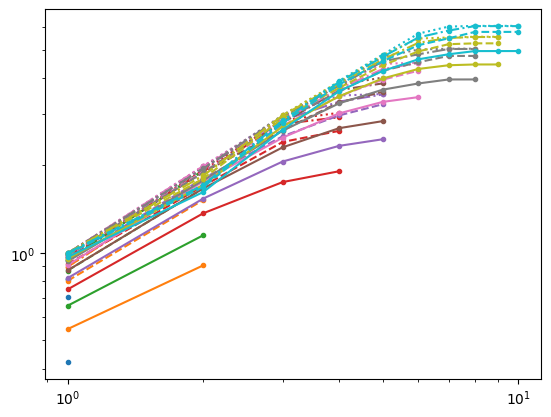

In [42]:
vector_length = 2**np.arange(1,11)
phase = np.linspace(-0.5, 0.5, 10)
scale = np.linspace(0.01, 4, 10)

noise_std = jnp.array([0.1, 0.25, 0.5, 1.0])
fixed = np.arange(0, 3)

fig, ax = plt.subplots()
for i,vl in tqdm(enumerate(vector_length)):
    num_bits = np.arange(1,jnp.log2(vl).astype(int)+1)
    MIs = sweep(
        int(vl),
        num_bits,
        phase,
        scale,
        noise_std,
        distribution="bipolar",
        fixed=jnp.array([0]),
    )

    max_idx = MIs.argmax(dim=("phase", "scale"))
    max_phase = MIs.coords["phase"][max_idx["phase"]]
    max_scale = MIs.coords["scale"][max_idx["scale"]]
    max_MI = MIs.max(dim=("phase", "scale"))
    
    ax.plot(num_bits, max_MI.squeeze(axis=(1,)), marker=".", color=f"C{i}", label=[f"noise-std: {std}" for std in noise_std])
    ax.set_prop_cycle(cycler('ls', [':', '-.', '--', '-']))

# plt.legend()